<a href="https://colab.research.google.com/github/hei1sme/MAI391_project/blob/main/MAI391_SE194127_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAI391 FINAL PROJECT - MALL CUSTOMER SEGMENTATION


## Nhập Thư Viện

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore
sns.set(style="whitegrid")

## Nhập Dataset

In [208]:
# Đọc dữ liệu từ dataset đã upload lên github
url = "https://raw.githubusercontent.com/hei1sme/MAI391_project/refs/heads/main/data/HR-Employee-Attrition.csv"
df = pd.read_csv(url)

# Kiểm tra số dòng và số cột
print(f"Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")

# Xem 5 dòng đầu tiên
df.head()

Dataset có 1470 dòng và 35 cột


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Khám Phá Dữ Liệu (Sơ Bộ)

### Kiểm Tra Thông Tin Dữ Liệu

In [211]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (1470, 35)


In [212]:
print("\n Thông tin dữ liệu:")
df.info()


 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [216]:
print("\n Số lượng giá trị thiếu trong từng cột:")
df.isnull().sum()


 Số lượng giá trị thiếu trong từng cột:


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [215]:
print("\nThống kê mô tả cho các biến số:")
df.describe()


Thống kê mô tả cho các biến số:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Kiểm tra phân phối dữ liệu

In [217]:
print("\nPhân bố của biến mục tiêu (Attrition):")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Tỷ lệ nhân viên nghỉ việc: {attrition_counts['Yes'] / len(df) * 100:.2f}%")


Phân bố của biến mục tiêu (Attrition):
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Tỷ lệ nhân viên nghỉ việc: 16.12%


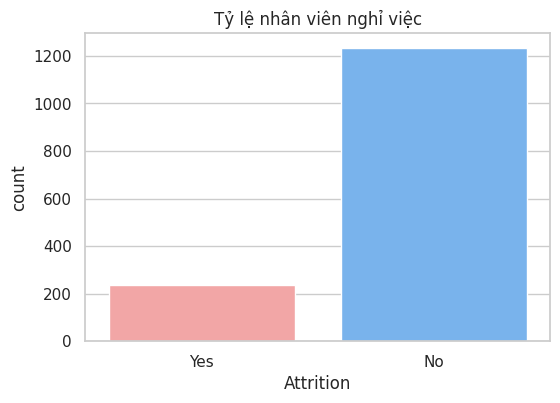

In [219]:
# Kiểm tra phân bố của biến mục tiêu
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Tỷ lệ nhân viên nghỉ việc")
plt.show()

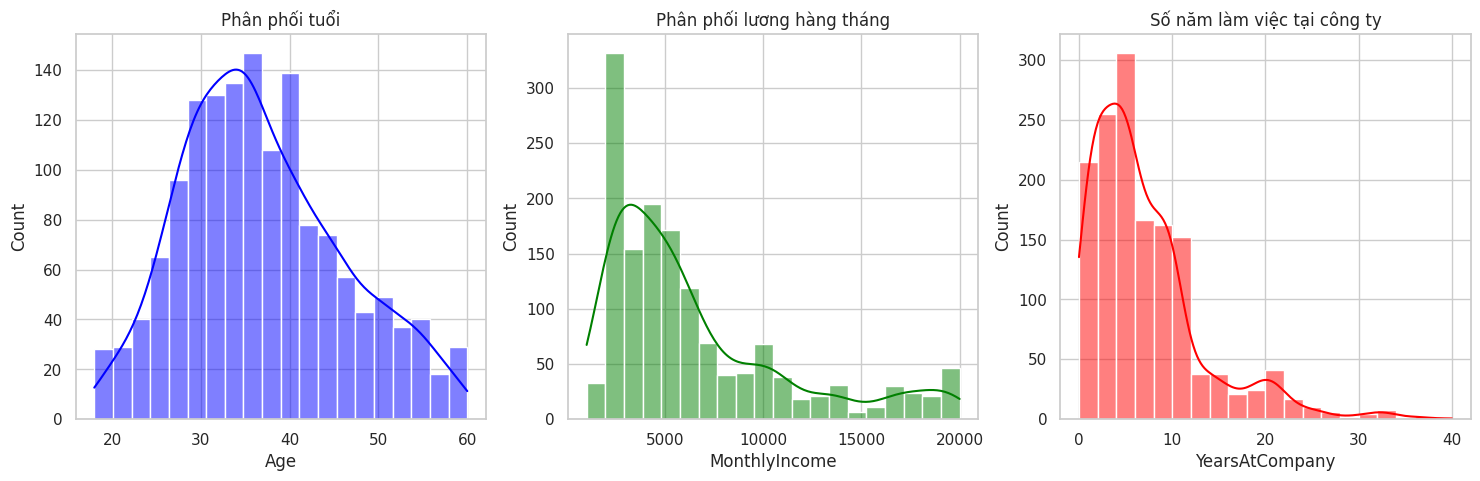

In [182]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ hộp cho mức lương theo trạng thái nhân viên
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"])
plt.title("Mức lương theo trạng thái nhân viên")
plt.show()

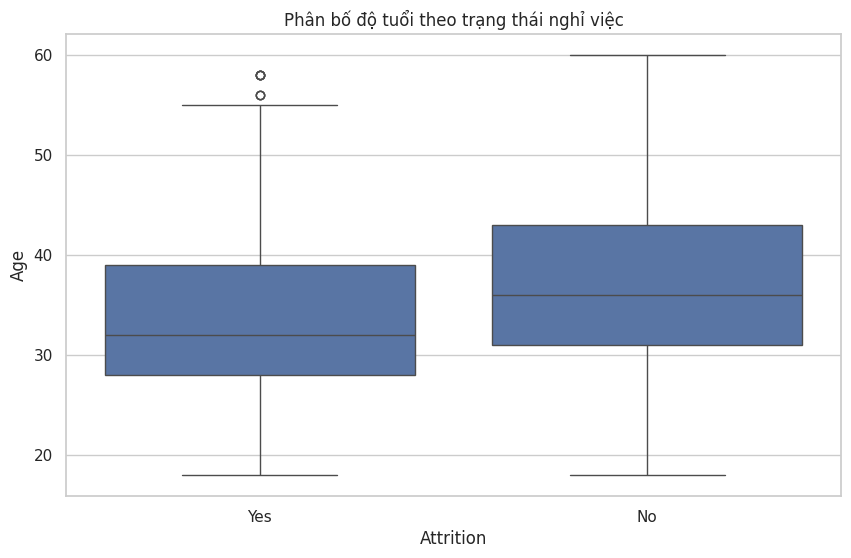

In [220]:
# Phân tích phân bố độ tuổi theo Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Phân bố độ tuổi theo trạng thái nghỉ việc')
plt.show()

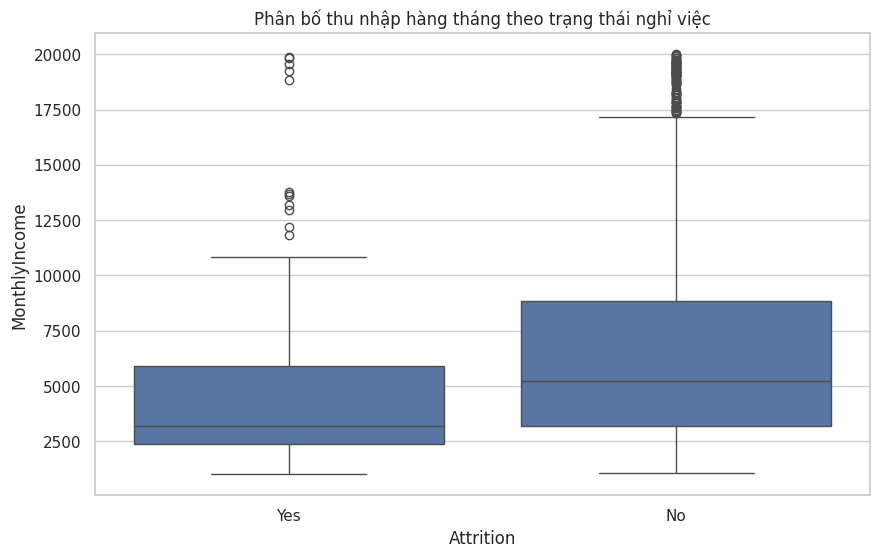

In [221]:
# Phân tích thu nhập hàng tháng theo Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Phân bố thu nhập hàng tháng theo trạng thái nghỉ việc')
plt.show()

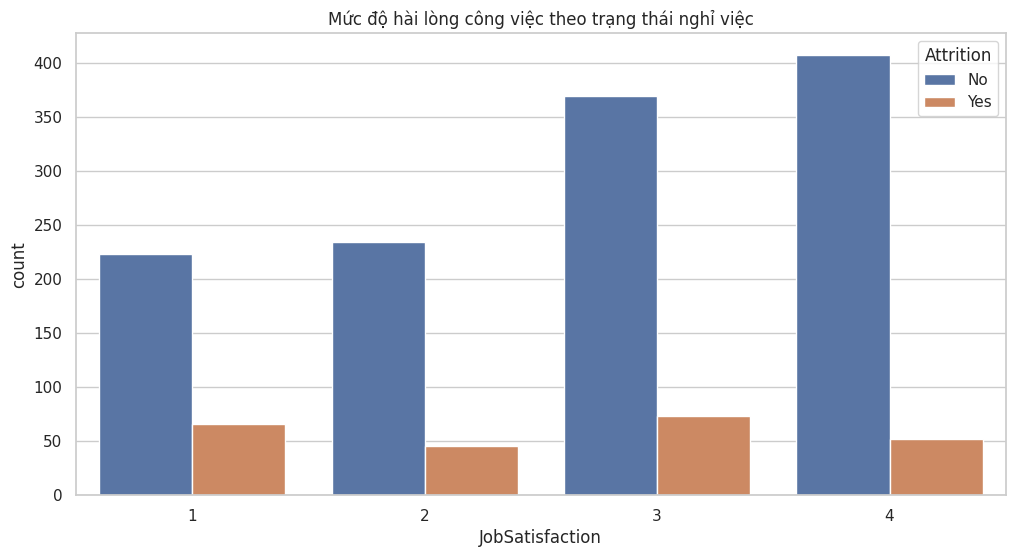

In [222]:
# Phân tích mức độ hài lòng công việc
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Mức độ hài lòng công việc theo trạng thái nghỉ việc')
plt.show()

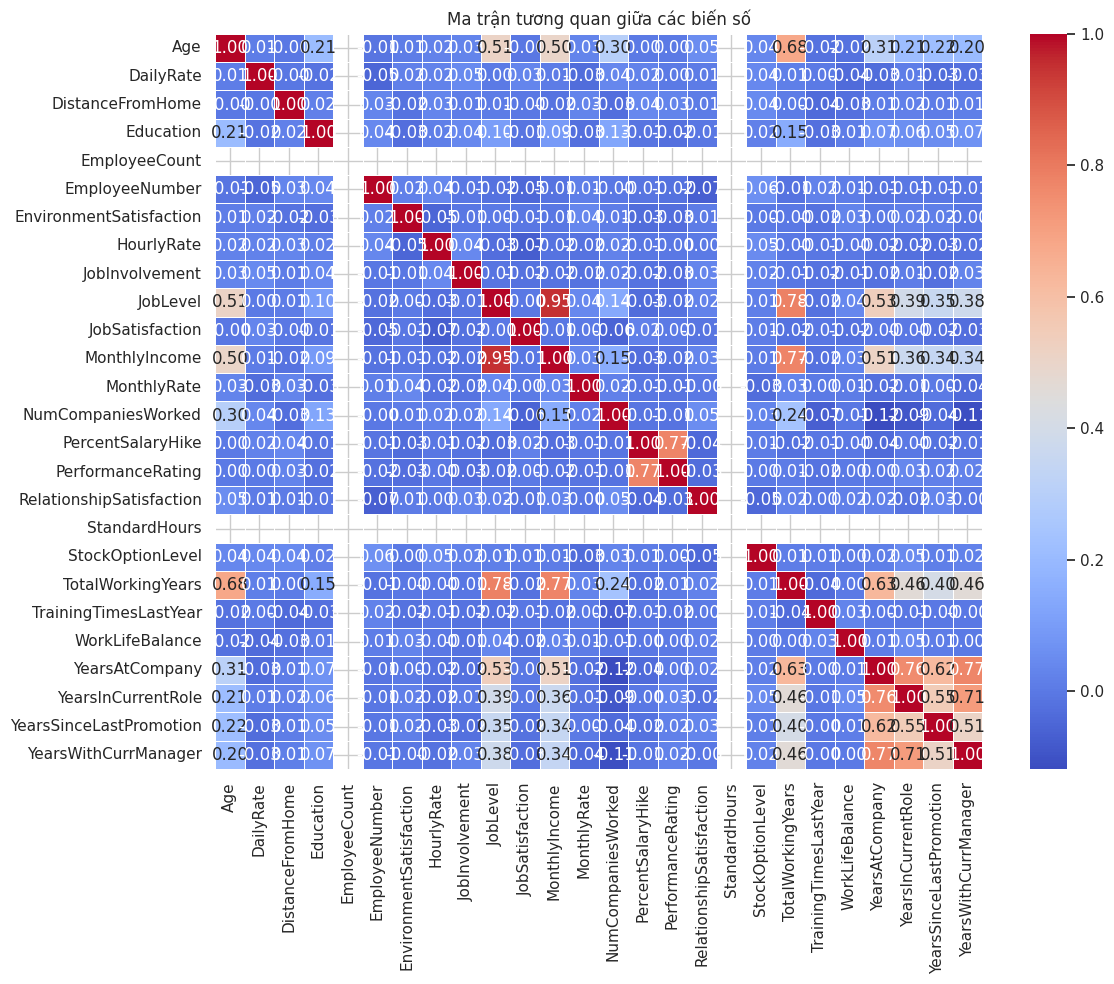

In [225]:
# Chỉ lấy các biến số (numeric)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số')
plt.tight_layout()
plt.show()

## Tiền Xử Lý Dữ Liệu

### Loại bỏ cột không cần thiết

In [199]:
# Loại bỏ các cột không cần thiết
df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], inplace=True)

# Kiểm tra lại dataset sau khi loại bỏ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Mã hóa dự liệu dạng phân loại

In [228]:
# Chuyển đổi biến mục tiêu thành dạng số
df['Attrition_Binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [231]:
# Xử lý các biến phân loại (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition')  # Đã xử lý biến này

print("\nCác biến phân loại cần xử lý:")
print(categorical_cols)


Các biến phân loại cần xử lý:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [233]:
# One-hot encoding cho các biến phân loại
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nKích thước dữ liệu sau khi encoding:", df_encoded.shape)
print("\nCác cột sau khi encoding:")
print(df_encoded.columns.tolist())


Kích thước dữ liệu sau khi encoding: (1470, 49)

Các cột sau khi encoding:
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Binary', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director

In [235]:
# Lựa chọn các biến để chuẩn hóa (không bao gồm biến mục tiêu)
features = df_encoded.drop(['Attrition', 'Attrition_Binary'], axis=1)

In [236]:
# Tự triển khai hàm chuẩn hóa (thay vì dùng StandardScaler)
def normalize_data(X):
    """
    Chuẩn hóa dữ liệu bằng cách trừ trung bình và chia cho độ lệch chuẩn
    X: DataFrame chứa dữ liệu cần chuẩn hóa
    Return: DataFrame đã chuẩn hóa
    """
    X_norm = X.copy()
    for column in X.columns:
        mean = X[column].mean()
        std = X[column].std()
        if std != 0:  # Tránh chia cho 0
            X_norm[column] = (X[column] - mean) / std
        else:
            X_norm[column] = 0  # Nếu độ lệch chuẩn = 0, gán giá trị 0
    return X_norm

In [237]:
# Chuẩn hóa dữ liệu
features_normalized = normalize_data(features)

In [238]:
# Thêm biến mục tiêu vào dữ liệu đã chuẩn hóa
df_normalized = features_normalized.copy()
df_normalized['Attrition'] = df_encoded['Attrition_Binary']

print("\nThống kê mô tả cho dữ liệu đã chuẩn hóa:")
print(df_normalized.describe())


Thống kê mô tả cho dữ liệu đã chuẩn hóa:
                Age     DailyRate  DistanceFromHome     Education  \
count  1.470000e+03  1.470000e+03      1.470000e+03  1.470000e+03   
mean  -1.389667e-17  3.625218e-17      6.525392e-17  4.833624e-18   
std    1.000000e+00  1.000000e+00      1.000000e+00  1.000000e+00   
min   -2.071487e+00 -1.735985e+00     -1.010565e+00 -1.867790e+00   
25%   -7.579120e-01 -8.363770e-01     -8.872132e-01 -8.913849e-01   
50%   -1.011244e-01 -1.203726e-03     -2.704519e-01  8.502032e-02   
75%    6.651278e-01  8.785782e-01      5.930139e-01  1.061426e+00   
max    2.526026e+00  1.726143e+00      2.443298e+00  2.037831e+00   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    HourlyRate  \
count         1470.0    1.470000e+03             1.470000e+03  1.470000e+03   
mean             0.0   -1.546760e-16             1.873029e-16  1.836777e-16   
std              0.0    1.000000e+00             1.000000e+00  1.000000e+00   
min              0.0

In [239]:
# Tìm tương quan giữa các biến với biến mục tiêu
correlation_with_target = df_normalized.corr()['Attrition'].sort_values(ascending=False)

print("\nTương quan giữa các biến và biến mục tiêu (Attrition):")
print(correlation_with_target)


Tương quan giữa các biến và biến mục tiêu (Attrition):
Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other    

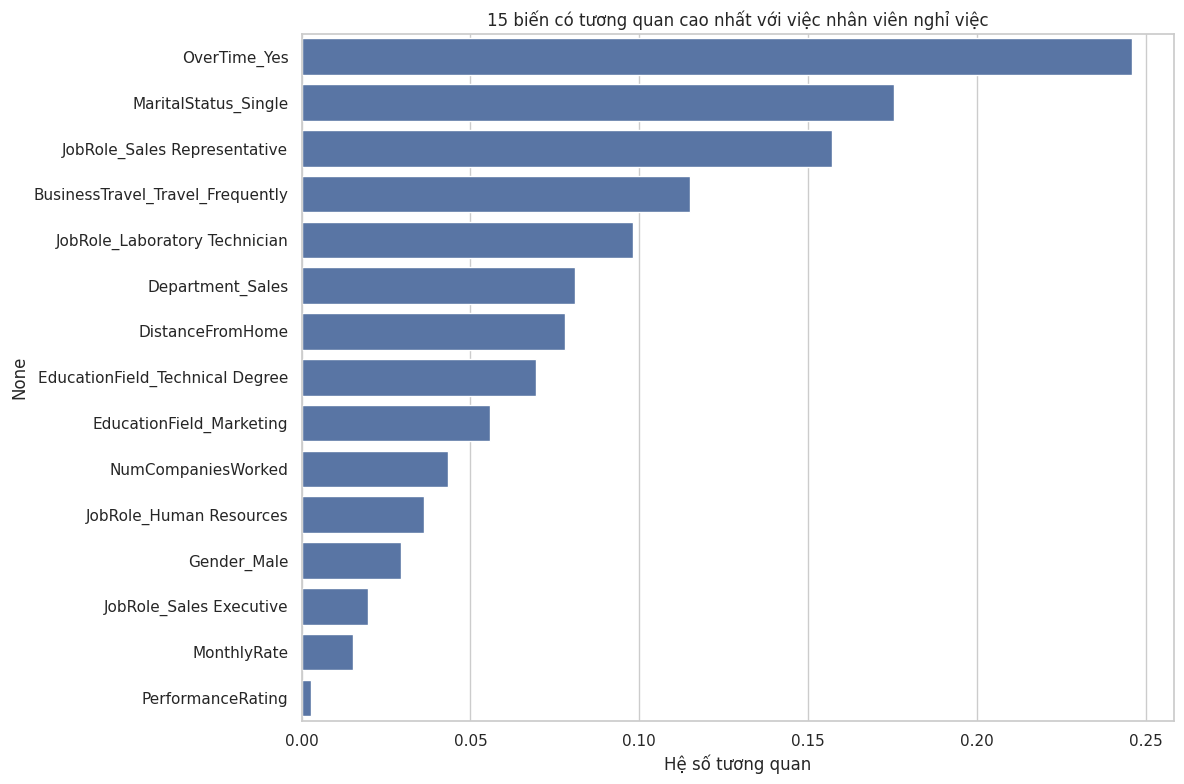

In [240]:
# Visualize các biến có tương quan cao nhất với biến mục tiêu
plt.figure(figsize=(12, 8))
top_features = correlation_with_target.iloc[1:16]  # Lấy 15 biến có tương quan cao nhất (trừ biến mục tiêu)
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('15 biến có tương quan cao nhất với việc nhân viên nghỉ việc')
plt.xlabel('Hệ số tương quan')
plt.tight_layout()
plt.show()

In [245]:
df_normalized.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,0.446199,0.742274,-1.010565,-0.891385,0,-1.700704,-0.660306,1.382668,0.379543,-0.057768,1.152861,-0.108313,0.725773,2.124413,-1.150163,-0.426085,-1.583639,0,-0.931697,-0.421499,-2.171243,-2.492972,-0.164557,-0.063274,-0.678915,0.245750,-0.481695,0.639623,-1.373583,1.514728,1.193638,-0.348136,-0.678910,-0.242977,-0.313987,-1.224328,-0.191433,-0.462307,-0.272966,-0.330696,-0.239822,-0.497704,1.872649,-0.244542,-0.918609,1.458154,1.591204,1
1,1.321915,-1.297333,-0.147100,-1.867790,0,-1.699043,0.254538,-0.240595,-1.025818,-0.057768,-0.660628,-0.291619,1.488370,-0.677819,2.128582,2.345353,1.191033,0,0.241906,-0.164455,0.155654,0.337981,0.488342,0.764737,-0.368590,0.806267,2.074591,-1.562358,0.727528,-0.659735,1.193638,-0.348136,-0.678910,-0.242977,-0.313987,0.816219,-0.191433,-0.462307,-0.272966,-0.330696,-0.239822,2.007860,-0.533640,-0.244542,1.087862,-0.685332,-0.628027,0
2,0.008340,1.413882,-0.887213,-0.891385,0,-1.695721,1.169383,1.284288,-1.025818,-0.961159,0.246116,-0.937335,-1.674271,1.323775,-0.057248,-0.426085,-0.658749,0,-0.931697,-0.550021,0.155654,0.337981,-1.143905,-1.167290,-0.678915,-1.155541,-0.481695,0.639623,0.727528,-0.659735,-0.837205,-0.348136,-0.678910,4.112823,-0.313987,0.816219,-0.191433,2.161595,-0.272966,-0.330696,-0.239822,-0.497704,-0.533640,-0.244542,-0.918609,1.458154,1.591204,1
3,-0.429518,1.460969,-0.763861,1.061426,0,-1.694060,1.169383,-0.486544,0.379543,-0.961159,0.246116,-0.763374,1.242788,-0.677819,-1.150163,-0.426085,0.266142,0,-0.931697,-0.421499,0.155654,0.337981,0.161892,0.764737,0.252060,-1.155541,2.074591,-1.562358,0.727528,-0.659735,1.193638,-0.348136,-0.678910,-0.242977,-0.313987,-1.224328,-0.191433,-0.462307,-0.272966,-0.330696,-0.239822,2.007860,-0.533640,-0.244542,1.087862,-0.685332,1.591204,0
4,-1.086306,-0.524116,-0.887213,-1.867790,0,-1.690738,-1.575150,-1.273580,0.379543,-0.961159,-0.660628,-0.644639,0.325789,2.524732,-0.876934,-0.426085,1.191033,0,0.241906,-0.678543,0.155654,0.337981,-0.817456,-0.615282,-0.058265,-0.595025,-0.481695,0.639623,0.727528,-0.659735,-0.837205,-0.348136,1.471947,-0.242977,-0.313987,0.816219,-0.191433,2.161595,-0.272966,-0.330696,-0.239822,-0.497704,-0.533640,-0.244542,1.087862,-0.685332,-0.628027,0


In [241]:
# 1.9: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    """
    Hàm tự triển khai để chia dữ liệu thành tập huấn luyện và tập kiểm tra

    Tham số:
    X: DataFrame chứa đặc trưng
    y: Series chứa biến mục tiêu
    test_size: Tỷ lệ dữ liệu dùng cho tập kiểm tra (mặc định: 0.2)
    random_state: Seed cho việc sinh số ngẫu nhiên

    Trả về:
    X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Số lượng mẫu
    n_samples = len(X)
    # Số lượng mẫu trong tập kiểm tra
    n_test = int(test_size * n_samples)

    # Tạo indices ngẫu nhiên
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    # Chia dữ liệu
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

# Chuẩn bị dữ liệu
X = df_normalized.drop('Attrition', axis=1)
y = df_normalized['Attrition']

In [242]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

print("\nKích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (1176, 47)
Kích thước tập kiểm tra: (294, 47)


In [243]:
# Chuyển về dạng array để dễ xử lý trong các phần sau
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

# In thông tin tổng kết
print("\n=== Tổng kết quá trình tiền xử lý dữ liệu ===")
print(f"Dữ liệu ban đầu: {df.shape[0]} mẫu, {df.shape[1]} đặc trưng")
print(f"Dữ liệu sau khi mã hóa biến phân loại: {df_encoded.shape[0]} mẫu, {df_encoded.shape[1]} đặc trưng")
print(f"Dữ liệu sau khi chuẩn hóa: {df_normalized.shape[0]} mẫu, {df_normalized.shape[1]} đặc trưng")
print(f"Tập huấn luyện: {X_train.shape[0]} mẫu, {X_train.shape[1]} đặc trưng")
print(f"Tập kiểm tra: {X_test.shape[0]} mẫu, {X_test.shape[1]} đặc trưng")
print("Tỷ lệ nhân viên nghỉ việc trong dữ liệu gốc:", f"{attrition_counts['Yes'] / len(df) * 100:.2f}%")
print("Tỷ lệ nhân viên nghỉ việc trong tập huấn luyện:", f"{y_train.mean() * 100:.2f}%")
print("Tỷ lệ nhân viên nghỉ việc trong tập kiểm tra:", f"{y_test.mean() * 100:.2f}%")


=== Tổng kết quá trình tiền xử lý dữ liệu ===
Dữ liệu ban đầu: 1470 mẫu, 36 đặc trưng
Dữ liệu sau khi mã hóa biến phân loại: 1470 mẫu, 49 đặc trưng
Dữ liệu sau khi chuẩn hóa: 1470 mẫu, 48 đặc trưng
Tập huấn luyện: 1176 mẫu, 47 đặc trưng
Tập kiểm tra: 294 mẫu, 47 đặc trưng
Tỷ lệ nhân viên nghỉ việc trong dữ liệu gốc: 16.12%
Tỷ lệ nhân viên nghỉ việc trong tập huấn luyện: 16.84%
Tỷ lệ nhân viên nghỉ việc trong tập kiểm tra: 13.27%
